# Body Fat Percent Estimation

### Problem Statement
- In this project, we are trying to estimate body fat percent from measurements such as weight, height, neck circumference, etc.
- We are also making use of density data here

### Dataset 
- Source - https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset
- The data consists of 252 rows and 15 columns
- Dataset information :
    - Density : Density determined from underwater weighing
    - BodyFat : Percent body fat derived from Siri's equation
    - Age : in years 
    - Weight : in lbs 
    - Height : in inches
    - Neck : circumference in cm
    - Chest : circumference in cm
    - Abdomen : 2 circumference in cm
    - Hip : circumference in cm
    - Thigh : middle part, circumference in cm
    - Knee : circumference in cm
    - Ankle : circumference in cm
    - Biceps : circumference in cm
    - Forearm : circumference in cm
    - Wrist : circumference in cm

### Importing required packages 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Importing data

In [2]:
df = pd.read_csv('data/body_fat.csv')

### Show top 5 records

In [3]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Shape of the dataset

In [4]:
df.shape 

(252, 15)

### Dataset columns

In [5]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

### Dataset info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


We observe that 
- we don't have any null values
- We don't have any categorical features

### Checking for duplicates

In [7]:
df.duplicated().sum()

0

- We observe that there are no duplicates 

### Checking number of unique values for each column

In [8]:
df.nunique()

Density    218
BodyFat    176
Age         51
Weight     197
Height      48
Neck        90
Chest      174
Abdomen    185
Hip        152
Thigh      139
Knee        90
Ankle       61
Biceps     104
Forearm     77
Wrist       44
dtype: int64

### Statistics of data

In [9]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


### Adding BMI column

In [10]:
df['BMI'] = (df['Weight'] * 703) / (df['Height'] * df['Height'])

In [11]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


## Visualization

### Body weight distribution

<Axes: xlabel='BodyFat', ylabel='Count'>

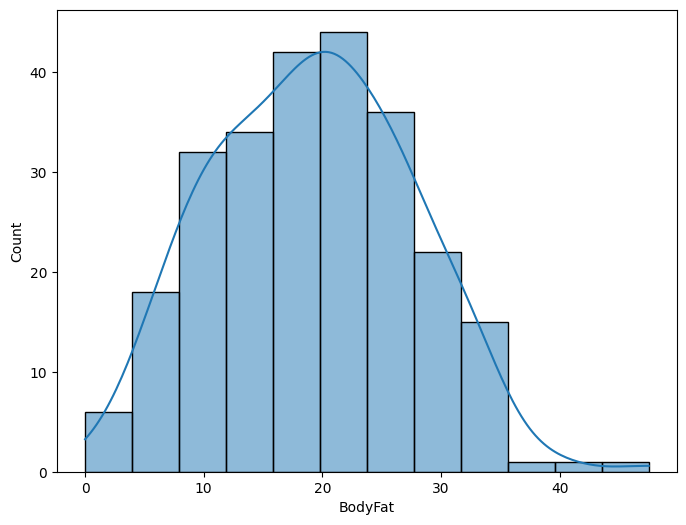

In [12]:
#fig, ax = plt.subplots(1, 2, figsize = (10, 6))
plt.figure(figsize=(8,6))
sns.histplot(data=df, x = 'BodyFat', kde = True)

- We observe that males have high variance in body fat percent compared to females.
- Female body fat percent is concentrated around 20 %

### Correlation

<Axes: >

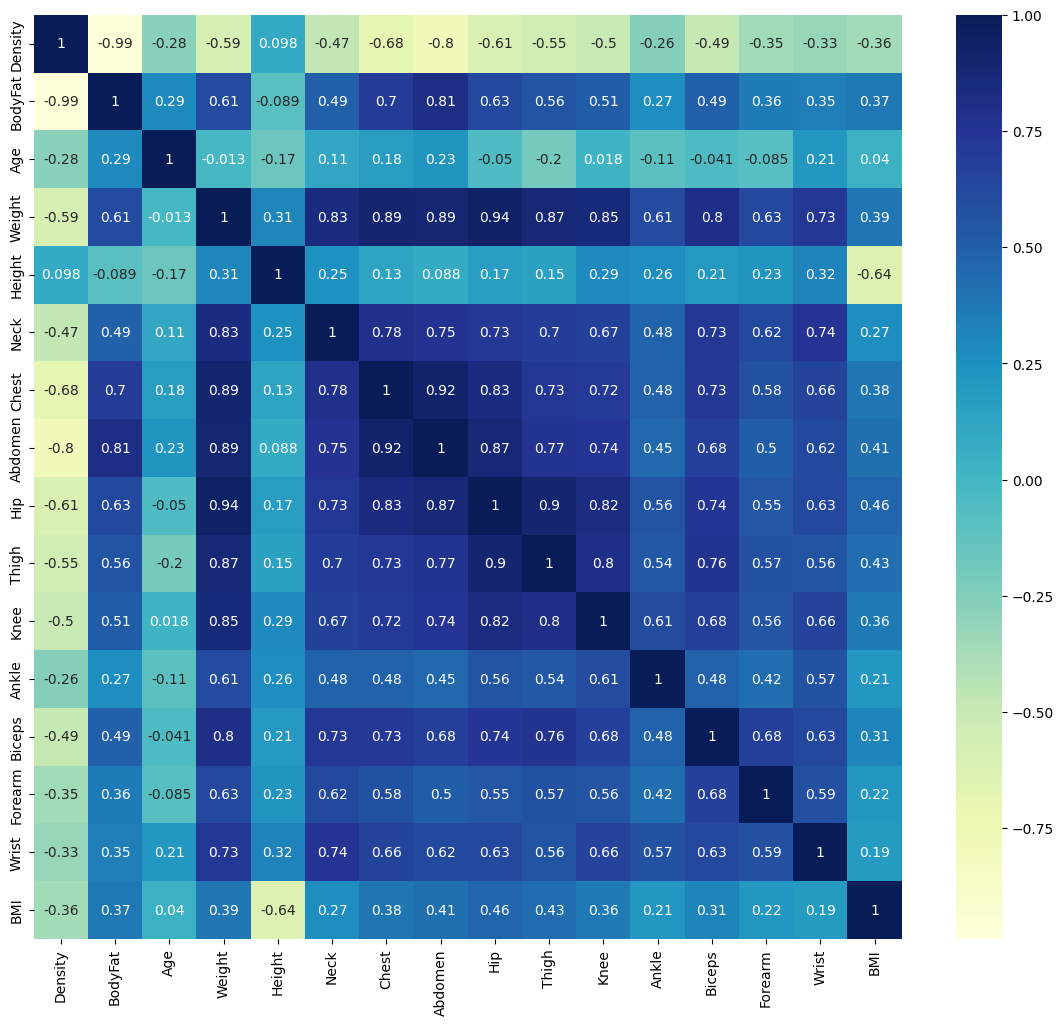

In [13]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 

### Histogram for all features

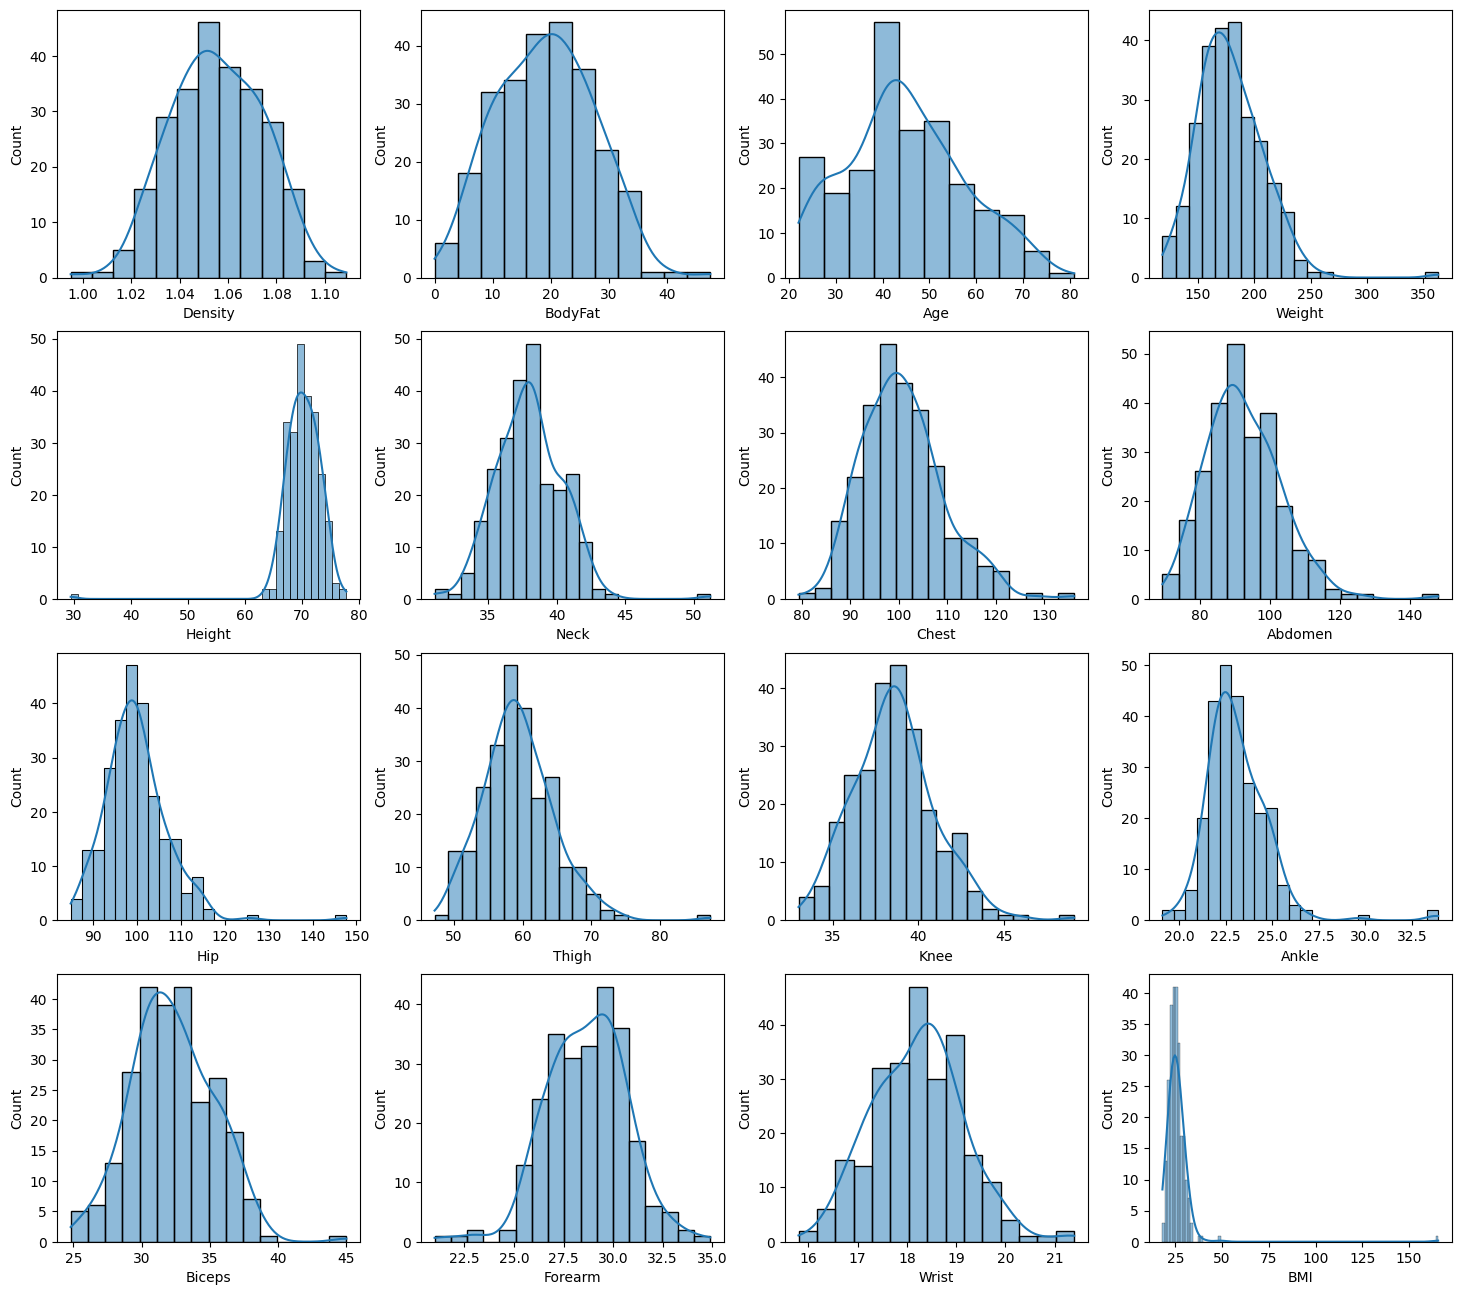

In [17]:
fig, axes = plt.subplots(4, 4, figsize = (18, 16))
i = 0 
for row_num in range(4):
    for col_num in range(4):
        sns.histplot(data=df, x = df.columns[i], kde = True,  ax = axes[row_num][col_num])
        i = i + 1

- We observe that for some features, we don't get normal distribution and observe skewness

### Skewness Values

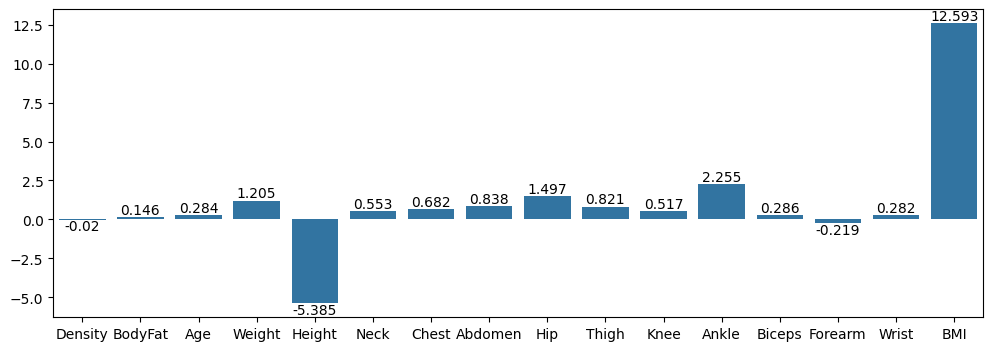

In [19]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x = df.skew().keys().to_list(), y = np.round(df.skew().values, 3))
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

We observe that certain features like weight, height, hip, ankle and BMI have really high skewness values 

### Taking care of outliers 

In [20]:
outlier_indices = set()

Using IQR to find outliers

In [21]:
def get_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR 
    upper_limit = Q3 + 1.5 * IQR 
    df_lower_outliers = df[df[feature] < lower_limit]
    df_upper_outliers = df[df[feature] > upper_limit]
    print(f'Feature Name : {feature}')
    print(f'limits : [{lower_limit}, {upper_limit}]')
    return df_lower_outliers, df_upper_outliers

Plotting histogram before and after outlier removal 

In [22]:
def histogram_outliers_plot(feature_name):
    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    sns.histplot(data=df, x = feature_name, kde=True, ax=ax[0])
    ax[0].set_title('Before Outlier Removal')
    sns.histplot(data=df_new, x = feature_name, kde=True, ax=ax[1])
    ax[1].set_title('After Outlier Removal')

### BMI

In [23]:
feature = 'BMI'
df_lower, df_upper = get_outliers(feature)

Feature Name : BMI
limits : [16.585703672954406, 33.77956098845546]


In [24]:
df_lower

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI


In [25]:
df_upper

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
38,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.906397
40,1.0217,34.5,45,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,39.079828
41,1.0250,32.9,44,205.00,29.50,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,165.601839
215,0.9950,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.587158
241,1.0207,35.0,65,224.50,68.25,38.8,119.6,118.0,114.3,61.3,42.1,23.4,34.9,30.1,19.4,33.881791


In [26]:
df_new = df.drop([38, 40, 41, 215])
df_new

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,21.024226
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,29.044437
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,30.138946
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.979981


In [27]:
outlier_indices.update([38, 40, 41, 215])

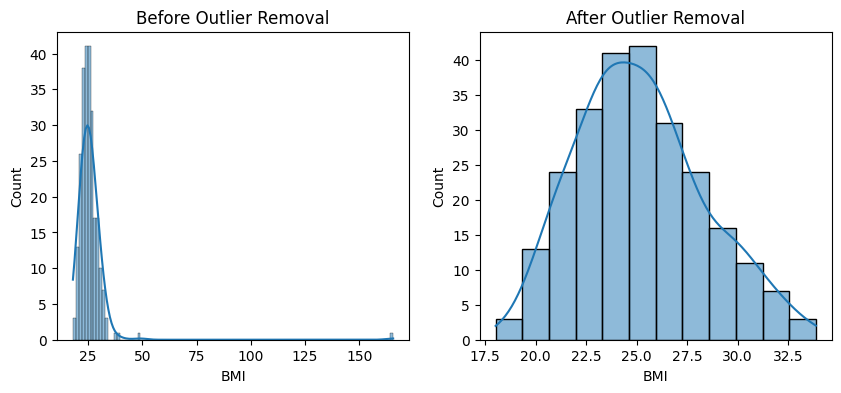

In [28]:
histogram_outliers_plot(feature)

In [29]:
skew_value_old = df[feature].skew()
skew_value_new = df_new[feature].skew()
print(feature)
print(f'Old skewness Value = {skew_value_old:.3f}')
print(f'New skewness Value = {skew_value_new:.3f}')

BMI
Old skewness Value = 12.593
New skewness Value = 0.400


### Height

In [30]:
df_lower, df_upper = get_outliers('Height')

Feature Name : Height
limits : [62.25, 78.25]


In [31]:
df_lower

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
41,1.025,32.9,44,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,165.601839


In [32]:
df_upper

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI


In [33]:
df_new = df.drop(41)
df_new

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,21.024226
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,29.044437
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,30.138946
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.979981


In [34]:
outlier_indices.add(41)

Text(0.5, 1.0, 'After Outlier Removal')

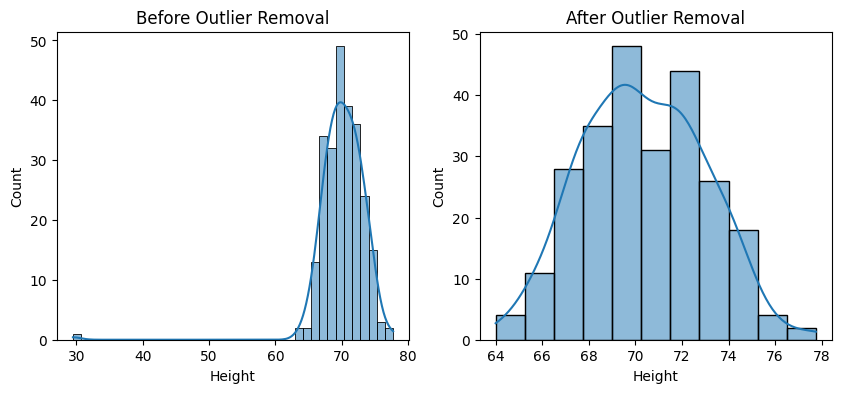

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.histplot(data=df, x = 'Height', kde=True, ax=ax[0])
ax[0].set_title('Before Outlier Removal')
sns.histplot(data=df_new, x = 'Height', kde=True, ax=ax[1])
ax[1].set_title('After Outlier Removal')

In [36]:
skew_value_old = df['Height'].skew()
skew_value_new = df_new['Height'].skew()
print(f'Old skewness Value = {skew_value_old:.3f}')
print(f'New skewness Value = {skew_value_new:.3f}')

Old skewness Value = -5.385
New skewness Value = 0.099


### Ankle 

In [37]:
df_lower, df_upper = get_outliers('Ankle')

Feature Name : Ankle
limits : [19.0, 27.0]


In [38]:
df_lower

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI


In [39]:
df_upper

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
30,1.0716,11.9,32,182.00,73.75,38.7,100.5,88.7,99.8,57.5,38.7,33.9,32.5,27.7,18.4,23.523539
38,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.906397
85,1.0386,26.6,67,167.00,67.50,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2,25.767023


In [40]:
df_new = df.drop([30, 38, 85])
df_new

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,21.024226
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,29.044437
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,30.138946
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.979981


In [41]:
outlier_indices.update([30, 38, 85])

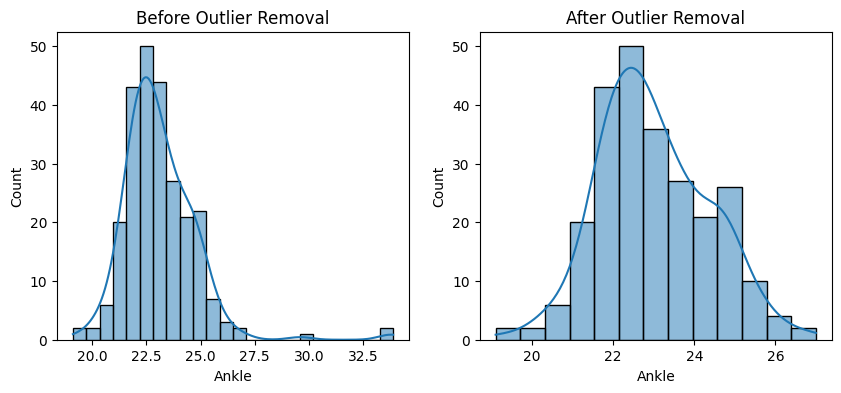

In [42]:
histogram_outliers_plot('Ankle')

In [43]:
skew_value_old = df['Ankle'].skew()
skew_value_new = df_new['Ankle'].skew()
print(f'Old skewness Value = {skew_value_old:.3f}')
print(f'New skewness Value = {skew_value_new:.3f}')

Old skewness Value = 2.255
New skewness Value = 0.271


### Hip

In [44]:
feature = 'Hip'
df_lower, df_upper = get_outliers(feature)

Feature Name : Hip
limits : [83.46249999999999, 115.56250000000001]


In [45]:
df_lower

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI


In [46]:
df_upper

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
34,1.0263,32.3,41,247.25,73.50,42.1,117.0,115.6,116.1,71.2,43.3,26.3,37.3,31.7,19.7,32.174881
38,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.906397
40,1.0217,34.5,45,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,39.079828


- We observe that hip value 116.1 is really close to the upper limit (115.56) , so we will remove only hip values 147.7 and 125.6

In [47]:
df_new = df.drop([38, 40])
df_new

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,21.024226
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,29.044437
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,30.138946
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.979981


In [48]:
outlier_indices.update([38, 40])

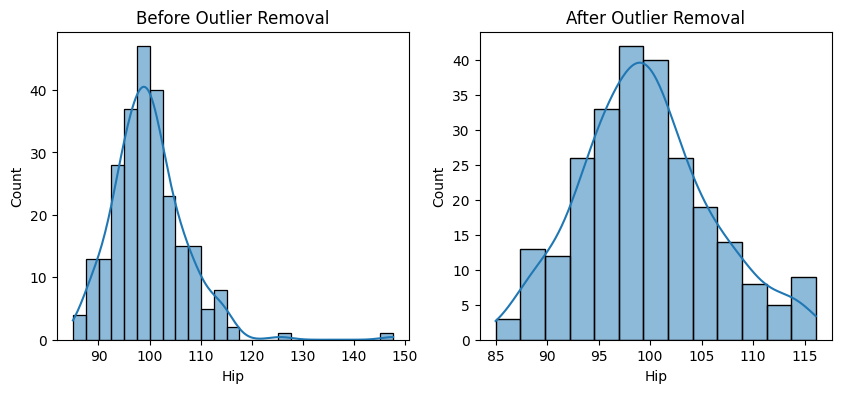

In [49]:
histogram_outliers_plot(feature)

In [50]:
skew_value_old = df[feature].skew()
skew_value_new = df_new[feature].skew()
print(feature)
print(f'Old skewness Value = {skew_value_old:.3f}')
print(f'New skewness Value = {skew_value_new:.3f}')

Hip
Old skewness Value = 1.497
New skewness Value = 0.317


### Weight

In [51]:
feature = 'Weight'
df_lower, df_upper = get_outliers(feature)

Feature Name : Weight
limits : [102.0, 254.0]


In [52]:
df_lower

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI


In [53]:
df_upper

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
38,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.906397
40,1.0217,34.5,45,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,39.079828


In [54]:
df_new = df.drop([38, 40])
df_new

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,21.024226
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,29.044437
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,30.138946
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.979981


In [55]:
outlier_indices.update([38, 40])

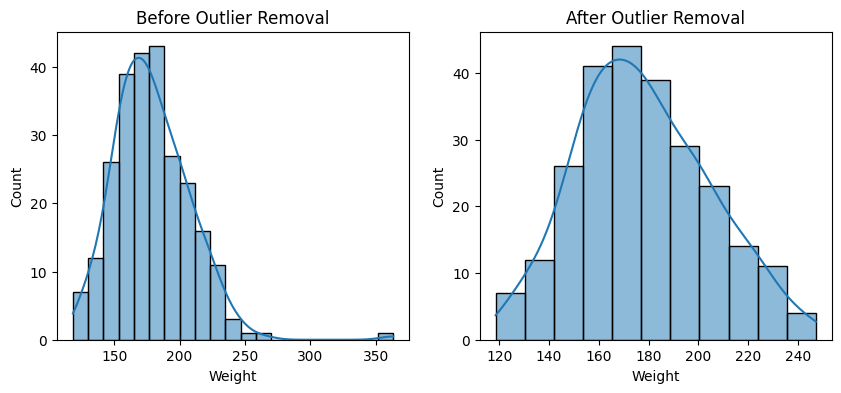

In [56]:
histogram_outliers_plot(feature)

In [57]:
skew_value_old = df[feature].skew()
skew_value_new = df_new[feature].skew()
print(feature)
print(f'Old skewness Value = {skew_value_old:.3f}')
print(f'New skewness Value = {skew_value_new:.3f}')

Weight
Old skewness Value = 1.205
New skewness Value = 0.290


### Histogram plots and Skewness Values after Outlier Removal 

In [58]:
outlier_indices

{30, 38, 40, 41, 85, 215}

In [59]:
df_new = df.drop(outlier_indices)

In [60]:
df_new.reset_index(inplace=True)
df_new

,index,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,21.024226
242,248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,29.044437
243,249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,30.138946
244,250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.979981


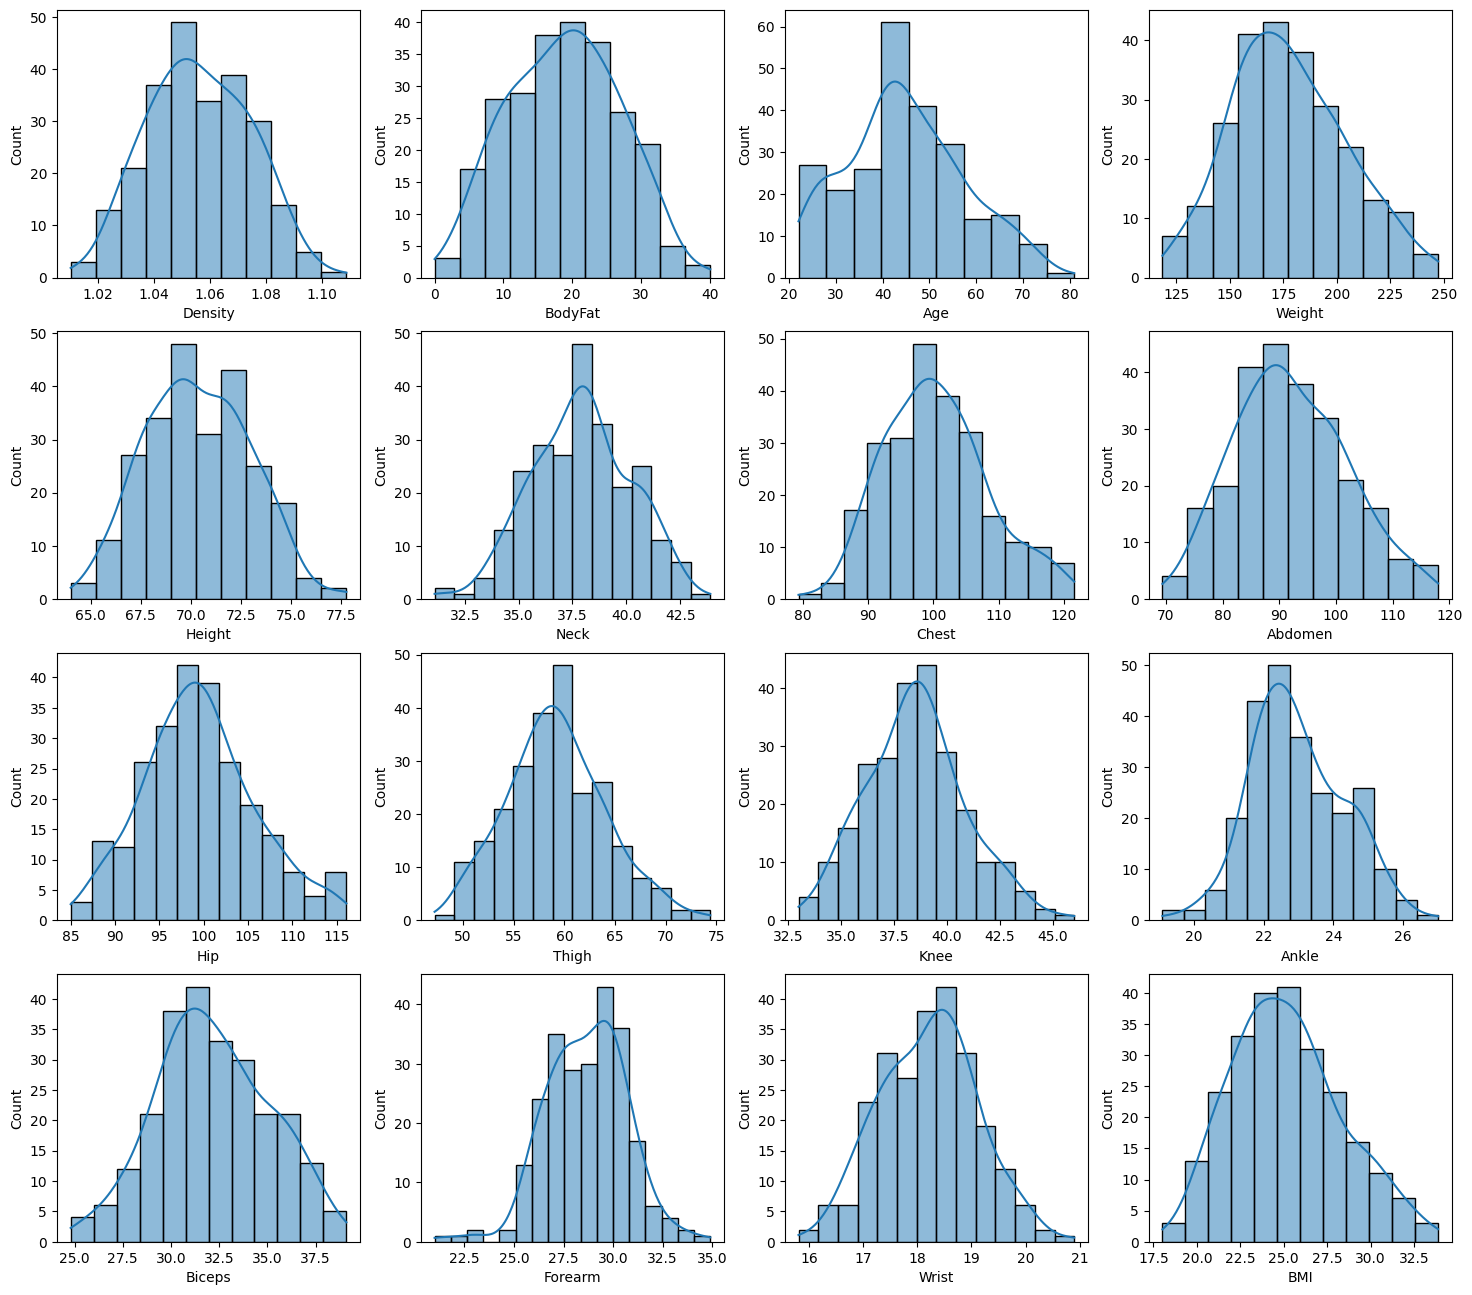

In [63]:
fig, axes = plt.subplots(4, 4, figsize = (18, 16))
i = 0 
for row_num in range(4):
    for col_num in range(4):
        sns.histplot(data=df_new, x = df.columns[i], kde = True,  ax = axes[row_num][col_num])
        i = i + 1

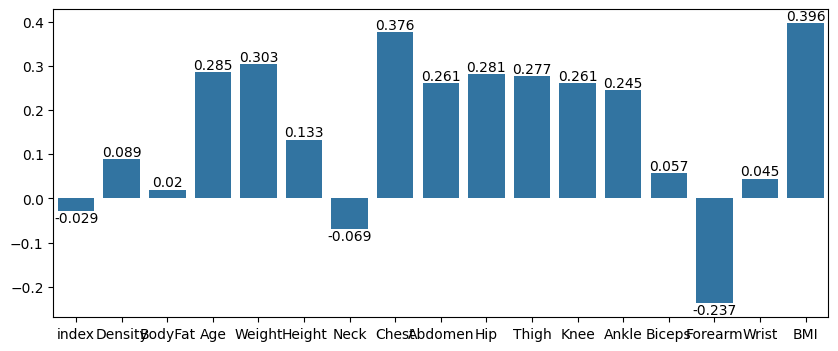

In [64]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(x = df_new.skew().keys().to_list(), y = np.round(df_new.skew().values, 3))
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

We observe that after removing 6 samples, we get normal distribution plots for most features and skewness values also drastically reduce 

### Correlation

<Axes: >

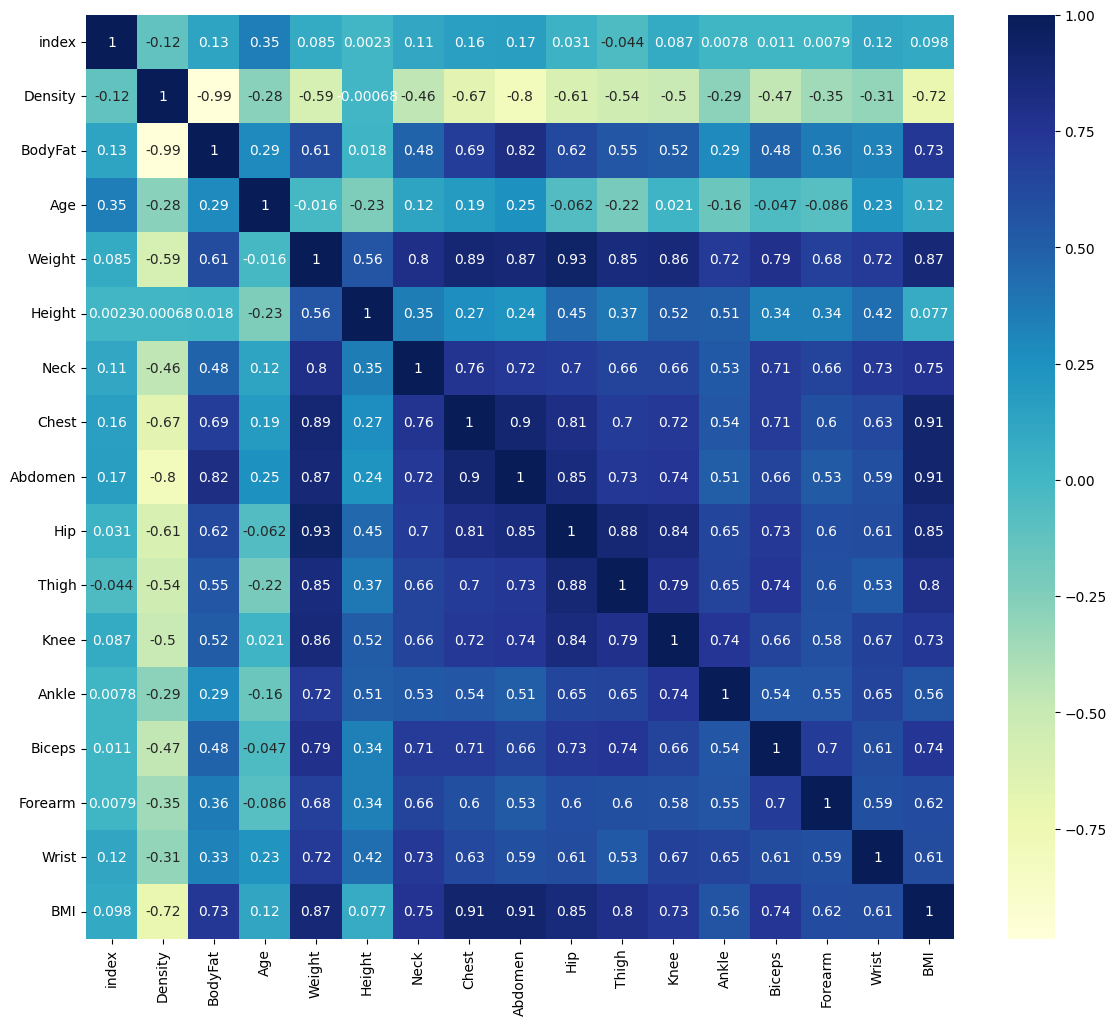

In [65]:
plt.figure(figsize=(14,12))
sns.heatmap(df_new.corr(), cmap="YlGnBu", annot=True) 

We observe that density has a high correlation with body fat